In [2]:
run //home/heather/galvanize/Capstone_1/git_info_wine_ratings/src/helper_functions.py

"cleaner" variable set to df
Missing value replaced with Cabernet
Dropped all null country rows
data frame called "cleaned" ready to go!
    country                                        description  points  price  \
0     Italy  Aromas include tropical fruit, broom, brimston...      87    NaN   
1  Portugal  This is ripe and fruity, a wine that is smooth...      87   15.0   

            province  
0  Sicily & Sardinia  
1              Douro  


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns


In [4]:
    #use cleaning functions 
df = cleaned

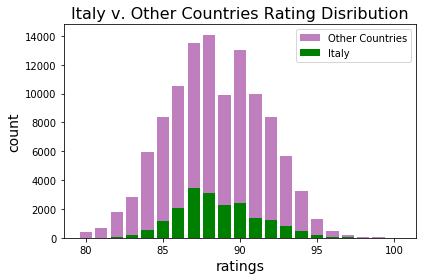

''

In [18]:
italian_count = region_based_df(df, 'country','Italy').groupby('points').count().reset_index()
non_it_count = non_it = region_based_df(df, 'country','Italy', equal_to = False).groupby('points').count().reset_index()


fig, ax = plt.subplots(1)
ax.bar('points', height= 'country' , data = non_it_count, label='Other Countries', color = 'purple', alpha = 0.5)
ax.bar('points', height = 'country' , data = italian_count, label = 'Italy', color = 'g', alpha = 1)
ax.set_xlabel('ratings', fontsize = 14)
ax.set_ylabel('count', fontsize = 14)
ax.set_title('Italy v. Other Countries Rating Disribution', fontsize = 16)
ax.legend()
plt.tight_layout()
#plt.savefig('Italy_Other_hist.png')
plt.show()
;

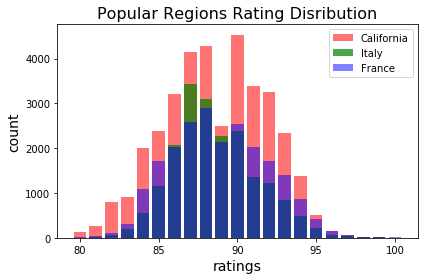

In [17]:
italian_count = region_based_df(df, 'country','Italy').groupby('points').count().reset_index()
cali_count = region_based_df(df, 'province','California').groupby('points').count().reset_index()
france_count = region_based_df(df, 'country','France').groupby('points').count().reset_index()


fig, ax = plt.subplots(1)
ax.bar('points', height = 'country', data = cali_count , label = 'California', color = 'r', alpha = 0.55)
ax.bar('points', height = 'country', data = italian_count , label = 'Italy', color = 'g', alpha = 0.7)
ax.bar('points', height = 'country', data = france_count , label = 'France', color = 'b', alpha = 0.5)
ax.set_xlabel('ratings', fontsize = 14)
ax.set_ylabel('count', fontsize = 14)
ax.set_title('Popular Regions Rating Disribution', fontsize = 16)
ax.legend(loc = 1)
plt.tight_layout()
#plt.savefig('bar_dist.png')
plt.show();

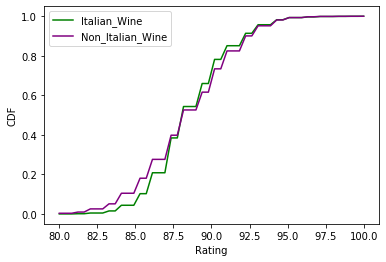

In [6]:
Italy_data = region_based_df(df, 'country', 'Italy')['points']
x_non_it_data = region_based_df(df, 'country', 'Italy', equal_to=False)['points']
dict_for_Italian_heavy = {'Italy':{'data':Italy_data, 'color': 'g', "label": 'Italian_Wine'}, 'Other':{'data':x_non_it_data, 'color':'purple', 'label': 'Non_Italian_Wine'}}


France_data = region_based_df(df, 'country', 'France')['points']
California_data = region_based_df(df, 'province', 'California')['points']


#plot CDF
fig, ax = plt.subplots(1)
plot_cdf_overlay_2(ax, dict_for_Italian_heavy, 80, 100)
ax.set_xlabel('Rating')
ax.set_ylabel('CDF')
plt.show()

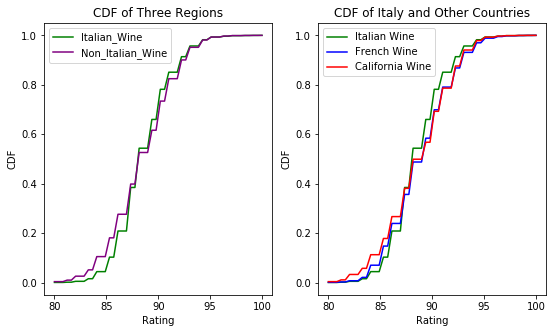

In [7]:
#add values to dictionary

distrib_dict = {'Italy': {'data':Italy_data, 'color': 'green', 'label': 'Italian Wine'}, 'France': {'data':France_data, 'color': 'blue', 'label': 'French Wine'}, 'California':{'data':California_data, 'color':'red', 'label':'California Wine'}}
dict_for_Italian_heavy = {'Italy':{'data':Italy_data, 'color': 'g', "label": 'Italian_Wine'}, 'Other':{'data':x_non_it_data, 'color':'purple', 'label': 'Non_Italian_Wine'}}

fig, ax = plt.subplots(1,2, figsize = (9,5))
plot_cdf_overlay_2(ax[1], distrib_dict, 80, 100)
plot_cdf_overlay_2(ax[0], dict_for_Italian_heavy, 80, 100)
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('CDF')
ax[0].set_title('CDF of Three Regions')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel('CDF')
ax[1].set_title('CDF of Italy and Other Countries')
#plt.savefig('side_by_side_cdf.png')
plt.show()

In [12]:
#next three cells run all

non_it = region_based_df(df, 'country','Italy', equal_to = False)
italian= region_based_df(df, 'country','Italy')

it_means = boot_strap_means(italian, 'points')
non_it_means = boot_strap_means(non_it, 'points')

In [13]:
cali= region_based_df(df, 'province','California')
france= region_based_df(df, 'country','France')
cal_means = boot_strap_means(cali, 'points')
fr_means = boot_strap_means(france, 'points')

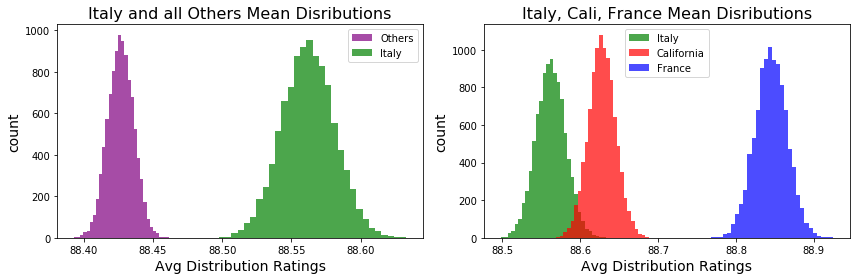

''

In [16]:
fig, axs = plt.subplots(1,2, figsize = (12, 4))
axs[0].hist(non_it_means, bins = 30, label='Others', color = 'purple', alpha = 0.7)
axs[0].hist(it_means, bins = 30, label = 'Italy', color = 'g', alpha = 0.7)
axs[0].set_xlabel('Avg Distribution Ratings', fontsize = 14)
axs[0].set_ylabel('count', fontsize =14)
axs[0].set_title('Italy and all Others Mean Disributions', fontsize = 16)
axs[0].legend()

axs[1].hist(it_means, bins = 30, label = 'Italy', color = 'g', alpha = 0.7)
axs[1].hist(cal_means, bins = 30, label='California', color = 'red', alpha = 0.7)
axs[1].hist(fr_means, bins = 30, label = 'France', color = 'blue', alpha = 0.7)
axs[1].set_xlabel('Avg Distribution Ratings', fontsize = 14)
axs[1].set_ylabel('count', fontsize = 14)
axs[1].set_title('Italy, Cali, France Mean Disributions', fontsize = 16)
axs[1].legend()
plt.tight_layout()
#plt.savefig('bootstrap_sidebysidehist.png')
plt.show()
;

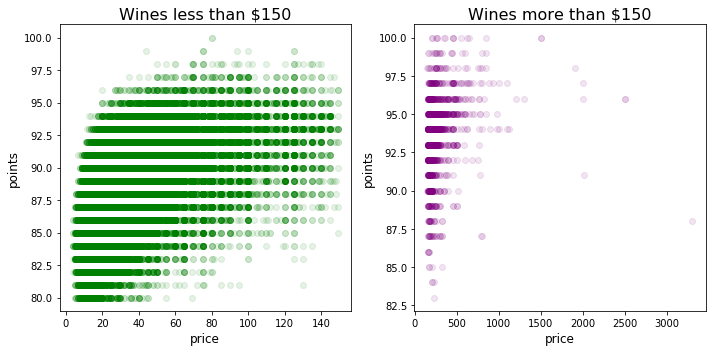

In [51]:
have_price = df.dropna(0, how = 'any', subset=['price'])
expensive = have_price[have_price['price']>150]
cheap = have_price[have_price['price']<150]


fig, axs = plt.subplots(1,2, figsize = (10, 5))
plt.subplots_adjust(wspace = 0.3)
axs[0].scatter('price', 'points', data = cheap, c = 'g',alpha = 0.1)
axs[0].set_xlabel('price',fontsize = 12)
axs[0].set_ylabel('points', fontsize = 12)
axs[0].set_title('Wines less than $150', fontsize = 16)
axs[1].scatter('price', 'points', data = expensive, c = 'purple' , alpha = 0.1)
axs[1].set_title('Wines more than $150', fontsize = 16)
axs[1].set_xlabel('price', fontsize = 12)
axs[1].set_ylabel('points', fontsize = 12)
plt.tight_layout()
#plt.savefig('price_scatter.png')
plt.show()